In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)

    # fill the missing values
    df['Age'].fillna(0,inplace=True)
    df['Cabin'].fillna(0,inplace=True)
    
    # Remove the outliers
    low,high = df['Fare'].quantile([0.1,0.9])
    mask_Fare = df['Fare'].between(low,high)
    df = df[mask_Fare]

    # drop the unrelated column
    df.drop(columns=['PassengerId','SibSp','Parch','Embarked','Name'],inplace=True)

    # Data conversion of gender
    df["Sex"] = df["Sex"].replace("female",1).replace("male",0)

    df.drop(columns=["Ticket","Cabin"],inplace=True)
    
    df['Age'] = df['Age'].astype(int)
    df['Fare'] = df['Fare'].astype(int)
    return df

In [3]:
df = wrangle(r"C:\Users\Lenovo\Documents\python\Titanic-Dataset.csv")
df.head()

,Survived,Pclass,Sex,Age,Fare
1,1,1,1,38,71
2,1,3,1,26,7
3,1,1,1,35,53
4,0,3,0,35,8
5,0,3,0,0,8


In [4]:
df.head()

,Survived,Pclass,Sex,Age,Fare
1,1,1,1,38,71
2,1,3,1,26,7
3,1,1,1,35,53
4,0,3,0,35,8
5,0,3,0,0,8


In [5]:
# individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.
features = ["Pclass","Sex","Fare","Age"]
target = ['Survived']

In [6]:
X = df[features]
y = df[target]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [8]:
model=make_pipeline(StandardScaler(),SVC())

In [9]:
model.fit(X_train,y_train)

C:\Users\Lenovo\anaco\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [10]:
round(model.score(X_train,y_train)*100,2)

80.94

In [11]:
round(model.score(X_test,y_test)*100,2)

84.03

In [12]:
y_pred = model.predict(X_test)

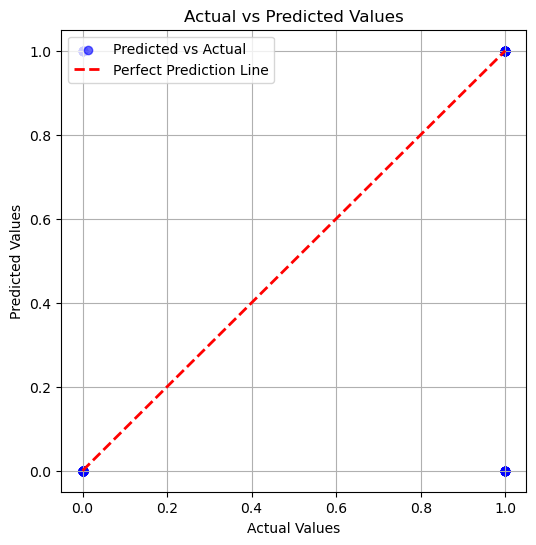

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', lw=2, label='Perfect Prediction Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred),2))

Accuracy: 0.84


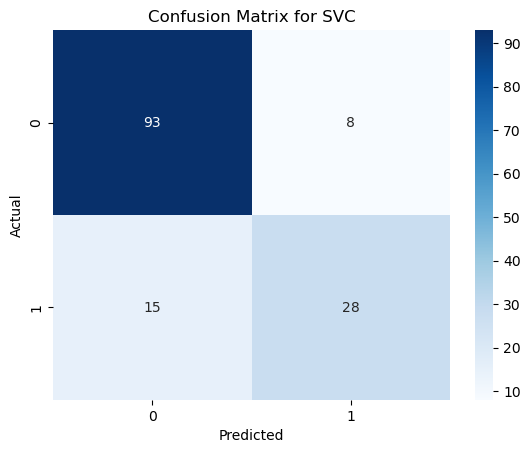

In [15]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC')
plt.show()

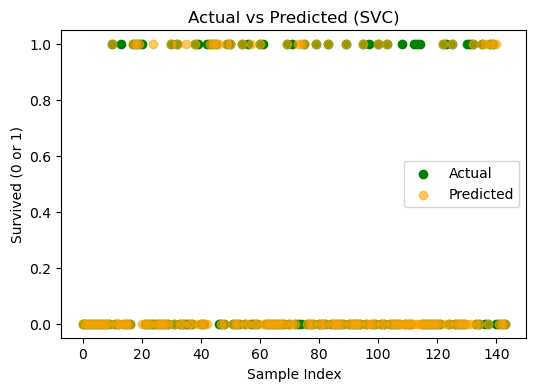

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='green')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='orange', alpha=0.6)
plt.legend()
plt.title('Actual vs Predicted (SVC)')
plt.xlabel('Sample Index')
plt.ylabel('Survived (0 or 1)')
plt.show()

In [17]:
import joblib

joblib.dump(model, "svc_titanic_model.pkl")

['svc_titanic_model.pkl']

In [18]:
mae = mean_absolute_error(y_pred, y_test)

In [19]:
round(mae,2)

0.16